In [8]:
### set env 
import numpy as np
import pandas as pd

import os
import pickle
import distogram

import plotly
import plotly.express as px

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

In [9]:
import sys
sys.path.insert(1, '..')
from config_sing import *

In [19]:
!ls -lh /home/mount/work/annotation/motif_cluster_jvierstra

total 608K
-rw-rw-r--   1 kk319 reddylab 3.3K Aug 31 14:35 hg38_all_motifs_chroms.txt
drwxrwsr-x+  2 kk319 reddylab  16K Aug 31 14:35 hg38_all_motifs_v1
-rw-rw-r--   1 kk319 reddylab 3.3K Aug 31 14:35 hg38_archetype_motifs_chroms.txt
-rw-rw-r--   1 kk319 reddylab 1.9K Aug 31 14:35 hg38_archetype_motifs_clusters_reduce.txt
drwxrwsr-x+ 28 kk319 reddylab  32K Aug 31 14:35 hg38_archetype_motifs_v1
-rw-rw-r--   1 kk319 reddylab 2.7K Sep  6 02:54 motif_score_histogram.pickle


In [20]:
FD_ANN

'/home/mount/work/annotation'

In [22]:
fdiry=os.path.join(FD_ANN, "motif_cluster_jvierstra")
fname="motif_score_histogram.pickle"
fpath=os.path.join(fdiry, fname)

with open(fpath, "rb") as f:
    h = pickle.load(f)

In [23]:
hist = distogram.histogram(h)
df_hist = pd.DataFrame(np.array(hist), columns=["bin", "count"])
df_hist

,bin,count
0,1.289880,1.819668e+06
1,1.579761,2.035022e+06
2,1.869641,2.146225e+06
3,2.159522,2.316355e+06
4,2.449402,2.616764e+06
...,...,...
95,28.828518,4.275527e+01
96,29.118398,4.267735e+02
97,29.408278,2.741147e+02
98,29.698159,1.484909e+01


In [25]:
nmin, nmax = distogram.bounds(h)
print("count: {}".format(distogram.count(h)))
print("mean: {}".format(distogram.mean(h)))
print("stddev: {}".format(distogram.stddev(h)))
print("min: {}".format(nmin))
print("5%: {}".format(distogram.quantile(h, 0.05)))
print("25%: {}".format(distogram.quantile(h, 0.25)))
print("50%: {}".format(distogram.quantile(h, 0.50)))
print("75%: {}".format(distogram.quantile(h, 0.75)))
print("90%: {}".format(distogram.quantile(h, 0.90)))
print("95%: {}".format(distogram.quantile(h, 0.95)))
print("max: {}".format(nmax))

count: 764808791
mean: 7.859920222725671
stddev: 1.9808727023157309
min: 1.0
5%: 4.493727204540978
25%: 7.076670821881816
50%: 7.798606510881964
75%: 8.724077517278433
90%: 9.843932057360167
95%: 10.811763779388539
max: 30.5678


In [24]:
fdiry=os.path.join(FD_ANN, "motif_cluster_jvierstra")
fname="motif_score_histogram.tsv"
fpath=os.path.join(fdiry, fname)

df_hist.to_csv(fpath, sep = "\t", index = False)

<BarContainer object of 100 artists>

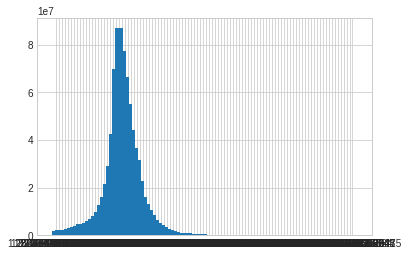

In [28]:
x = df_hist["bin"].values
y = df_hist["count"].values
plt.bar(x, y, tick_label=x)

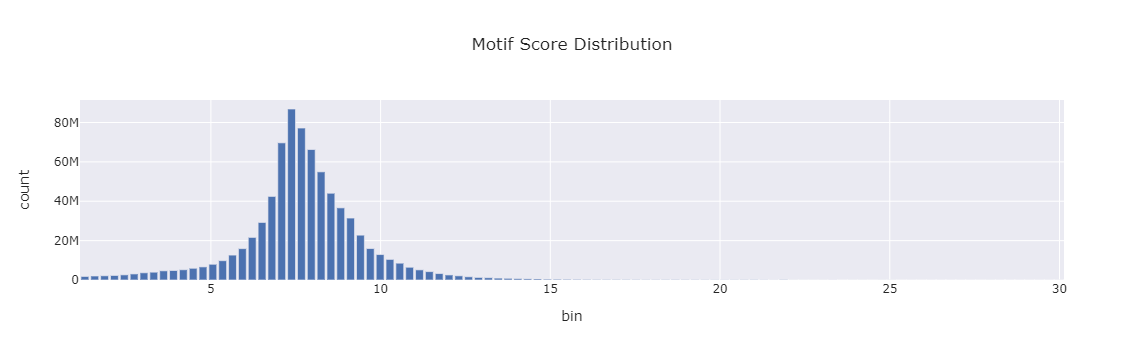

In [35]:
hist = distogram.histogram(h)
df_hist = pd.DataFrame(np.array(hist), columns=["bin", "count"])

px.defaults.template = "seaborn"
fig = px.bar(df_hist, x="bin", y="count", title="Motif Score Distribution")
fig.update_layout(height=100)
fig.show()

In [36]:
nmin, nmax = distogram.bounds(h)
print("count: {}".format(distogram.count(h)))
print("mean: {}".format(distogram.mean(h)))
print("stddev: {}".format(distogram.stddev(h)))
print("min: {}".format(nmin))
print("5%: {}".format(distogram.quantile(h, 0.05)))
print("25%: {}".format(distogram.quantile(h, 0.25)))
print("50%: {}".format(distogram.quantile(h, 0.50)))
print("75%: {}".format(distogram.quantile(h, 0.75)))
print("90%: {}".format(distogram.quantile(h, 0.90)))
print("95%: {}".format(distogram.quantile(h, 0.95)))
print("max: {}".format(nmax))

count: 764808791
mean: 7.859920222725671
stddev: 1.9808727023157309
min: 1.0
5%: 4.493727204540978
25%: 7.076670821881816
50%: 7.798606510881964
75%: 8.724077517278433
90%: 9.843932057360167
95%: 10.811763779388539
max: 30.5678


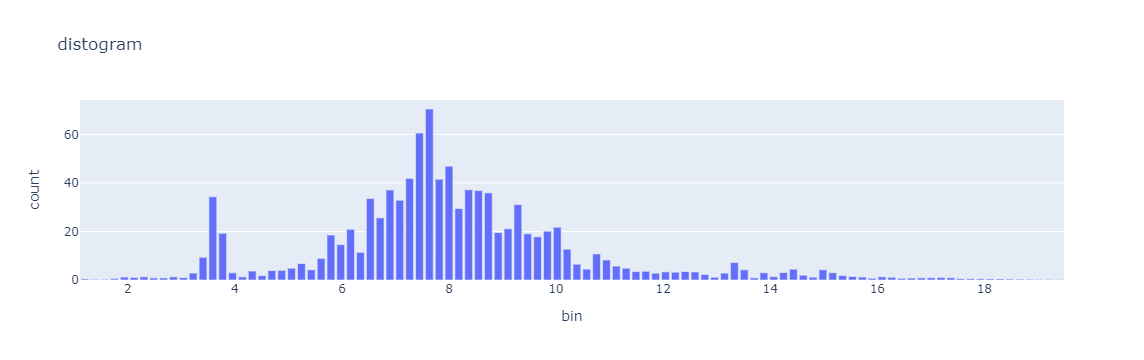

In [13]:
hist = distogram.histogram(h)
df_hist = pd.DataFrame(np.array(hist), columns=["bin", "count"])
fig = px.bar(df_hist, x="bin", y="count", title="distogram")
fig.update_layout(height=100)
fig.show()

In [26]:
size=10000
distribution = np.random.normal(size=size)

# Create and feed distogram from distribution
h = distogram.Distogram()
for i in distribution:
    h = distogram.update(h, i)

In [27]:
df_distribution = pd.DataFrame(distribution)
display(df_distribution.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))

,0
count,10000.000000
mean,0.007006
std,1.002877
min,-4.090448
5%,-1.610730
25%,-0.671918
50%,0.001951
75%,0.693146
95%,1.649765
max,3.670732


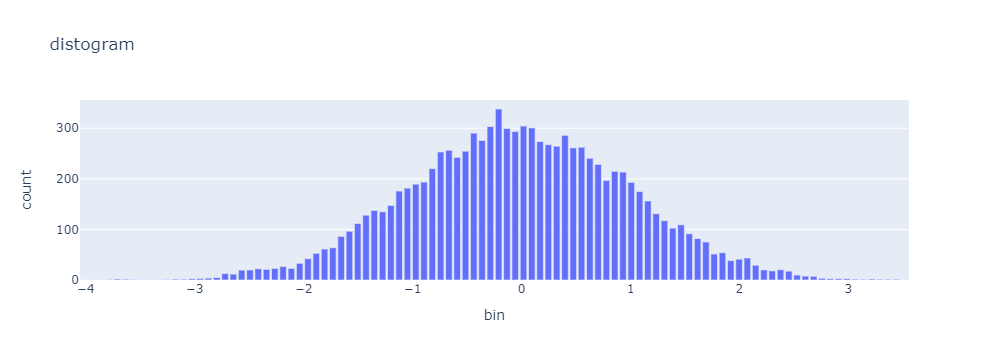

In [28]:
# Compute estimated histogram of the distribution 
hist = distogram.histogram(h)
df_hist = pd.DataFrame(np.array(hist), columns=["bin", "count"])
fig = px.bar(df_hist, x="bin", y="count", title="distogram")
fig.update_layout(height=300)
fig.show()